In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import uproot
import numpy as np

In [11]:
dfsData = []
dfsDataLite = []
with uproot.open('/home/mdicosta/LocalTestsO2/corrbkgs/Dplus/AO2D.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfcanddpfullp' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")

['DF_2336518079463007;1', 'DF_2336518079463007/O2hfcanddpfullp;1', 'DF_2336518079463007/O2hfcanddplite;1', 'DF_2336518079463039;1', 'DF_2336518079463039/O2hfcanddpfullp;1', 'DF_2336518079463039/O2hfcanddplite;1', 'parentFiles;1']
DF_2336518079463007/O2hfcanddpfullp;1
DF_2336518079463039/O2hfcanddpfullp;1
len(full_df): 151


In [12]:
print(full_df.columns)

Index(['fIndexBCs', 'fPt', 'fEta', 'fPhi', 'fY', 'fFlagMcMatchGen',
       'fFlagMcDecayChanGen', 'fOriginMcGen'],
      dtype='object')


In [13]:
unique_values = full_df['fFlagMcMatchGen'].unique()
print("Unique values in fFlagMcMatchGen:", unique_values)

full_df = full_df[full_df['fFlagMcMatchGen'] != 0]
print(f"Unique values in fFlagMcMatchGen after filtering: {full_df['fFlagMcMatchGen'].unique()}")
print(f"len(full_df) after filtering: {len(full_df)}")

Unique values in fFlagMcMatchGen: [-1  1]
Unique values in fFlagMcMatchGen after filtering: [-1  1]
len(full_df) after filtering: 151


In [14]:
unique_values = sorted(full_df['fFlagMcDecayChanGen'].unique())
print("Unique values in fFlagMcDecayChanGen:", unique_values)

Unique values in fFlagMcDecayChanGen: [0, 1, 2, 3]


In [15]:
unique_values = full_df['fFlagMcMatchGen'].unique()
print("Number of unique values in fFlagMcMatchGen:", len(unique_values))
print("Unique values in fFlagMcMatchGen:", unique_values)

Number of unique values in fFlagMcMatchGen: 2
Unique values in fFlagMcMatchGen: [-1  1]


In [ ]:
# Check if all resonant flags have been activated
particles = {
    'Dplus': [1, 4],
    'Ds': [5, 9],
    'Dstar': [10, 10],
    'Lc': [11, 14],
    'Xic': [15, 17],
}

for particle, flag_range in particles.items():
    filtered_df = full_df[
        (abs(full_df['fFlagMcMatchGen']) >= flag_range[0]) &
        (abs(full_df['fFlagMcMatchGen']) <= flag_range[1])
    ].copy()  # Ensure it's a separate copy

    unique_fin_states = filtered_df['fFlagMcMatchGen'].unique()
    unique_fin_states_sorted = sorted(unique_fin_states)  # Sort in increasing order

    unique_dec_chns = filtered_df['fFlagMcDecayChanGen'].unique()
    unique_dec_chns_sorted = sorted(unique_dec_chns)  # Sort in increasing order

    print(f"[{particle}]:\n\tNCands: {len(filtered_df)}, \n\tUnique values in fFlagMcMatchGen after filtering (sorted): {unique_fin_states_sorted} \n\tUnique values in fFlagMcDecayChanGen after filtering (sorted): {unique_dec_chns_sorted}")

[D0]:
	NCands: 0, 
	Unique values in fFlagMcMatchGen after filtering (sorted): [] 
	Unique values in fFlagMcDecayChanGen after filtering (sorted): []
[Dplus]:
	NCands: 0, 
	Unique values in fFlagMcMatchGen after filtering (sorted): [] 
	Unique values in fFlagMcDecayChanGen after filtering (sorted): []
[Ds]:
	NCands: 0, 
	Unique values in fFlagMcMatchGen after filtering (sorted): [] 
	Unique values in fFlagMcDecayChanGen after filtering (sorted): []
[Dstar]:
	NCands: 0, 
	Unique values in fFlagMcMatchGen after filtering (sorted): [] 
	Unique values in fFlagMcDecayChanGen after filtering (sorted): []
[Lc]:
	NCands: 0, 
	Unique values in fFlagMcMatchGen after filtering (sorted): [] 
	Unique values in fFlagMcDecayChanGen after filtering (sorted): []
[Xic]:
	NCands: 0, 
	Unique values in fFlagMcMatchGen after filtering (sorted): [] 
	Unique values in fFlagMcDecayChanGen after filtering (sorted): []


In [17]:
unique_values = full_df['fFlagMcDecayChanGen'].unique()
print("Unique values in fFlagMcDecayChanGen:", unique_values)

Unique values in fFlagMcDecayChanGen: [0 1 2 3]


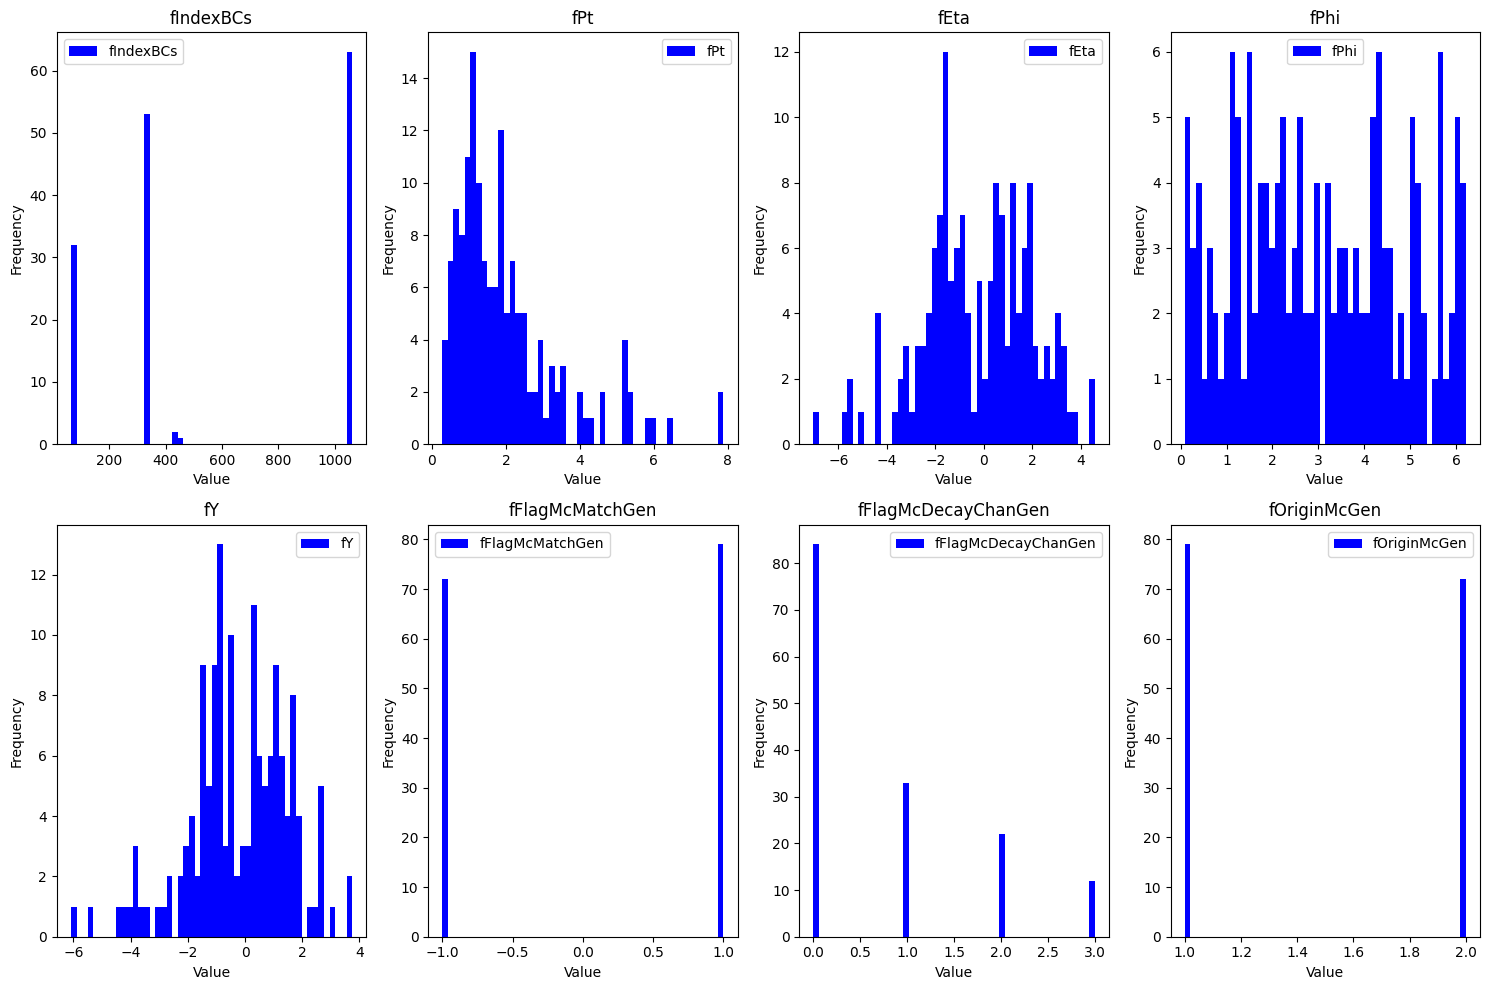

In [18]:
n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(full_df.columns):
    data = full_df[column]
    finite_data = data[np.isfinite(data)]  # Filter out NaN and inf

    if len(finite_data) == 0:
        axes[i].set_visible(False)
        continue

    axes[i].hist(finite_data, bins=50, color='blue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend([column])

# Hide any unused axes
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
